### Multi-input Autoencoder model on CTG dataset
- Load Data
- Preprocess Data
- Perform PCA on Data
- Divide Dataset in 2 smaller datasets of fewer features
- Define Multi-input Autoencoder Model
- Train Model
- Generate predictions for Train and Test Sets
- Perform PCA on Encoded Data
- Evaluate generated data on classification models

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load Data
ctg_data = pd.read_csv('../CTGRawData.csv', sep=';')

In [3]:
# Preprocess Data
# Separate Features from labels (last column)
y = ctg_data['NSP']
X = ctg_data.drop('NSP',axis=1).iloc[:,:21]
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [4]:
# Normalization of data sets
# Data Scaling MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = X_train
X_test_norm = X_test

X_train_norm = pd.DataFrame(scaler.fit_transform(X_train_norm))
X_test_norm = pd.DataFrame(scaler.transform(X_test_norm))

In [16]:
# Divide the dataset into 2 subsets with fewer features, approximately in half.
X_train_first = X_train_norm.iloc[:,:11]
X_train_second = X_train_norm.iloc[:,11:]
X_test_first = X_test_norm.iloc[:,:11]
X_test_second = X_test_norm.iloc[:,11:]

_____________________________
### PCA

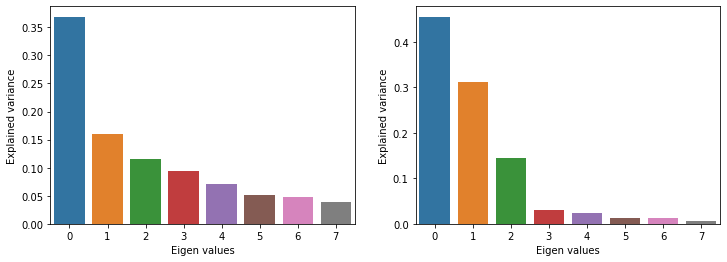

Simple PCA explained variance ratio: 0.9478109686950158
Simple PCA explained variance ratio: 0.9982391389477946


In [20]:
# Perform PCA to find the most significant features
from sklearn.decomposition import PCA
# select the number of components
pca_first = PCA(n_components = 8)
X_train_pca_first = pca_first.fit_transform(X_train_first)
X_test_pca_fist = pca_first.transform(X_test_first)

pca_second = PCA(n_components = 8)
X_train_pca_second = pca_second.fit_transform(X_train_second)
X_test_pca_second = pca_second.transform(X_test_second)

#x_pca_train_labeled = np.c_[X_train_pca_first , y_train]
#x_pca_test_labeled = np.c_[X_test_pca , y_test]

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1,2,1)
sns.barplot(np.arange(np.shape(pca_first.explained_variance_ratio_)[0]),pca_first.explained_variance_ratio_)
plt.xlabel("Eigen values")
plt.ylabel("Explained variance")

ax1 = plt.subplot(1,2,2)
sns.barplot(np.arange(np.shape(pca_second.explained_variance_ratio_)[0]),pca_second.explained_variance_ratio_)
plt.xlabel("Eigen values")
plt.ylabel("Explained variance")
plt.show()

print(f"Simple PCA explained variance ratio: {pca_first.explained_variance_ratio_.sum()}")
print(f"Simple PCA explained variance ratio: {pca_second.explained_variance_ratio_.sum()}")


In [ ]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
ax1 = plt.subplot(1,2,1)
sns.scatterplot(x=simple_encoded_pca_train_labeled[:,0], 
                y=simple_encoded_pca_train_labeled[:,1], 
                alpha = 0.8, 
                s= 170, legend='full', 
                hue=encoded_pca_train_labeled[:,-1],
                palette=sns.color_palette("OrRd")[:2:-1])
sns.scatterplot(x=simple_encoded_pca_test_labeled[:,0],
                y=simple_encoded_pca_test_labeled[:,1],
                alpha = 0.6, 
                s= 370, 
                legend='full',
                hue=simple_encoded_pca_test_labeled[:,-1], 
                palette=sns.color_palette("Blues_d")[:2:-1])
ax1.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.,framealpha=1, frameon=True, fontsize="x-small")
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.figure.set_size_inches( (16,6) )
ax1.set_title("PCA of training data (Simple AE)")

ax1 = plt.subplot(1,2,2)
sns.scatterplot(x=complex_encoded_pca_train_labeled[:,0], 
                y=complex_encoded_pca_train_labeled[:,1], 
                alpha = 0.8, 
                s= 170, legend='full', 
                hue=encoded_pca_train_labeled[:,-1],
                palette=sns.color_palette("OrRd")[:2:-1])
sns.scatterplot(x=complex_encoded_pca_test_labeled[:,0],
                y=complex_encoded_pca_test_labeled[:,1],
                alpha = 0.6, 
                s= 370, 
                legend='full',
                hue=complex_encoded_pca_test_labeled[:,-1], 
                palette=sns.color_palette("Blues_d")[:2:-1])
ax1.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.,framealpha=1, frameon=True, fontsize="x-small")
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.figure.set_size_inches( (16,6) )
ax1.set_title("PCA of training data (Complex AE)")

plt.yticks(rotation=45) 
plt.show()